<a href="https://colab.research.google.com/github/AdityaBavadekar/Models/blob/master/EvenNoPred_Model_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch

In [ ]:
torch.manual_seed(42)

$$X_i * W_i + B_i$$
$$F(x) = [(x)(Weights) + Biases]$$



In [ ]:
weights = torch.randn(2, 3, requires_grad=True)
biases = torch.randn(2, requires_grad=True)
print(weights)
print(biases)

tensor([[ 0.3367,  0.1288,  0.2345],
        [ 0.2303, -1.1229, -0.1863]], requires_grad=True)
tensor([ 2.2082, -0.6380], requires_grad=True)


In [ ]:
features = torch.randint(0, 100, (5, 3), dtype=torch.float32)
targets = torch.randint(0, 100, (5, 2), dtype=torch.float32)
print(features)
print(targets)

tensor([[15., 95., 67.],
        [ 6., 49., 76.],
        [73., 11., 99.],
        [13., 41., 69.],
        [87., 19., 72.]])
tensor([[80., 75.],
        [29., 33.],
        [64., 39.],
        [76., 32.],
        [10., 86.]])


In [ ]:
len(features.T) == len(weights.T)

True

In [ ]:
features @ weights.T + biases

tensor([[  35.2044, -116.3384],
        [  28.3591,  -68.4369],
        [  51.4153,  -14.6216],
        [  28.0443,  -56.5374],
        [  50.8289,  -15.3489]], grad_fn=<AddBackward0>)

In [ ]:
features.matmul(weights.T) + biases

tensor([[  35.2044, -116.3384],
        [  28.3591,  -68.4369],
        [  51.4153,  -14.6216],
        [  28.0443,  -56.5374],
        [  50.8289,  -15.3489]], grad_fn=<AddBackward0>)

In [ ]:
def model(x):
  return x.matmul(weights.T) + biases

In [ ]:
preds = model(features)
print(preds)

tensor([[  35.2044, -116.3384],
        [  28.3591,  -68.4369],
        [  51.4153,  -14.6216],
        [  28.0443,  -56.5374],
        [  50.8289,  -15.3489]], grad_fn=<AddBackward0>)


In [ ]:
print(targets)

tensor([[80., 75.],
        [29., 33.],
        [64., 39.],
        [76., 32.],
        [10., 86.]])


In [ ]:
error_matrix = preds - targets
error_matrix

tensor([[ -44.7956, -191.3383],
        [  -0.6409, -101.4369],
        [ -12.5847,  -53.6216],
        [ -47.9557,  -88.5374],
        [  40.8289, -101.3489]], grad_fn=<SubBackward0>)

In [ ]:
# Mean squared error
(error_matrix*error_matrix).sum() / error_matrix.numel()

tensor(7401.7749, grad_fn=<DivBackward0>)

In [ ]:
def mse(a, b):
  '''Mean squared error'''
  error = a - b
  return (error * error).sum() / error.numel()


In [ ]:
loss = mse(preds, targets)
print(loss)

tensor(7401.7749, grad_fn=<DivBackward0>)


In [ ]:
# Compute gradients
loss.backward()

In [ ]:
# Gradients
print('Weights:')
print(weights)
print('Grad:')
print(weights.grad)

Weights:
tensor([[ 0.3367,  0.1288,  0.2345],
        [ 0.2303, -1.1229, -0.1863]], requires_grad=True)
Grad:
tensor([[  266.8459, -1123.1698,  -933.0316],
        [-3472.2837, -5858.6108, -7848.7241]])


In [ ]:
c = 1e-8
with torch.no_grad():
  weights -= weights.grad * c
  biases -= biases.grad * c

In [ ]:
print('Weights:')
print(weights)
print('Biases:')
print(biases)

Weights:
tensor([[ 0.3367,  0.1288,  0.2345],
        [ 0.2304, -1.1227, -0.1862]], requires_grad=True)
Biases:
tensor([ 2.2082, -0.6380], requires_grad=True)


In [ ]:
# Gradients
print('Biases:')
print(biases)
print('Grad:')
print(biases.grad)

Biases:
tensor([ 2.2082, -0.6380], requires_grad=True)
Grad:
tensor([ -13.0296, -107.2566])


Initial Weights


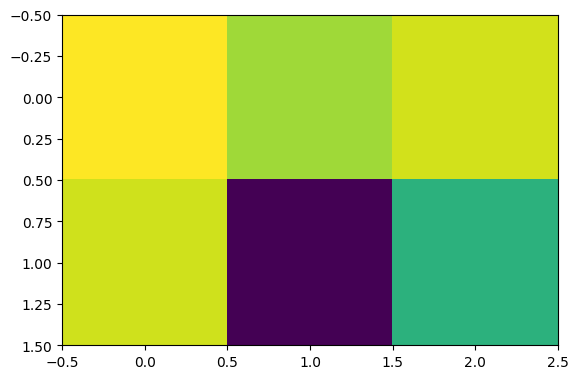

Grad Weights


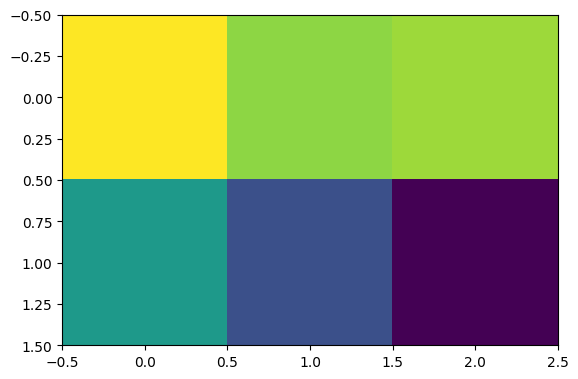

In [ ]:
import matplotlib.pyplot as plt

# https://stackoverflow.com/questions/61288116/visualizing-weights-of-trained-neural-network-in-keras

print('Initial Weights')
plt.imshow(weights.detach())
plt.show()

print('Grad Weights')
plt.imshow(weights.grad.detach())
plt.show()

In [ ]:
# @title Element Wise Multitplication
torch.tensor(
    [
      [1,2],
      [3,4]
    ]
) * torch.tensor(
    [
      [1,2],
      [3,4]
    ]
)

tensor([[ 1,  4],
        [ 9, 16]])

In [ ]:
# @title Matrix Multitplication
torch.tensor(
    [
      [1,2],
      [3,4]
    ]
) @ torch.tensor(
    [
      [1,2],
      [3,4]
    ]
)

tensor([[ 7, 10],
        [15, 22]])

In [ ]:
inputs = torch.tensor(
    [
        [2,4,6,8],
        [0,2,4,6],
        [30,32,34,38],
        [100,102,104,106],
        [346,348,350,352],
        [56,58,60,62],
        [94,96,98,100],
        [12, 14, 16, 18],
        [48, 50, 52, 54],
        [128, 130, 132, 134]
    ],
    dtype=torch.float32
)

inputs = torch.tensor(
    [
        [2, 4, 6, 8],
        [0, 2, 4, 6],
        [30, 32, 34, 36],
        [100, 102, 104, 106],
        [346, 348, 350, 352],
        [56, 58, 60, 62],
        [94, 96, 98, 100],
        [12, 14, 16, 18],
        [48, 50, 52, 54],
        [128, 130, 132, 134],
        [10, 12, 14, 16],
        [20, 22, 24, 26],
        [110, 112, 114, 116],
        [76, 78, 80, 82],
        [196, 198, 200, 202],
        [8, 10, 12, 14],
        [18, 20, 22, 24],
        [200, 202, 204, 206],
        [60, 62, 64, 66],
        [140, 142, 144, 146],
        [16, 18, 20, 22],
        [26, 28, 30, 32],
        [190, 192, 194, 196],
        [70, 72, 74, 76],
        [210, 212, 214, 216],
        [6, 8, 10, 12],
        [36, 38, 40, 42],
        [180, 182, 184, 186],
        [50, 52, 54, 56],
        [156, 158, 160, 162]
    ],
    dtype=torch.float32
)

targets = torch.tensor(
    [
        10,
        8,
        38,
        108,
        354,
        64,
        102,
        20,
        56,
        136,
        18,
        28,
        118,
        84,
        206,
        16,
        26,
        208,
        68,
        148,
        24,
        34,
        198,
        78,
        218,
        14,
        42,
        188,
        58,
        164
    ],
    dtype=torch.float32
)

In [ ]:
class L1():
  def __init__(self, input_shape, output_shape) -> None:
    self.weights = torch.randn(input_shape, requires_grad=True)
    self.biases = torch.randn(output_shape, requires_grad=True)

  def zero_grads(self):
      self.weights.grad.zero_()
      self.biases.grad.zero_()

  def forward(self, x):
    return x.matmul(self.weights.T) + self.biases

  def update_weights_biases(self, lr):
    with torch.no_grad():
      self.weights -= self.weights.grad * lr
      self.biases -= self.biases.grad * lr

      self.weights.grad.zero_()
      self.biases.grad.zero_()


class Model():

  def __init__(self, lr=1e-8) -> None:
    self.lr = lr
    self.layers = [
        L1((1,4), 1),
        L1(1, 1),
        L1(1, 4),
        L1(4, 16),
        L1(16, 1),
    ]

  def forward(self, x):
    logits = x
    for l in self.layers:
      logits = l.forward(logits)
    return logits

  def train_step(self, x, y):
    preds = self.forward(x)

    loss = mse(preds, y)
    loss.backward()

    for l in self.layers:
      l.update_weights_biases(lr=self.lr)

    return loss.item()

  def eval(self, x):
    with torch.no_grad():
      return self.forward(x)

  def __repr__(self) -> str:
    return  '\n'.join([
        f'{type(self).__name__}(',
        '  ' + ',\n  '.join([type(l).__name__ for l in self.layers]),
        ')'
     ])

In [ ]:
def train(model, inputs, targets, epochs=100):
  run_losses = []
  for t in range(epochs):
    loss = []
    for i in range(len(inputs)):
      loss.append(model.train_step(inputs[i], targets[i]))
    run_losses.append(np.mean(loss))
    if t % 10 == 0 or t+1 == epochs:
      print(f'Epoch {t+1: ^3}/{epochs}, Loss:', run_losses[-1])

  print('Done.')

  return run_losses

After experimenting with various learning rates right from 1e-6 to 2e-9, I found a perfect match, but it is surely possible that next time this is executed without even changing any part of code, the loss might not reach 0, 1, or 2.

In [ ]:
model = Model(1.77e-7)
losses = train(model, inputs, targets, epochs=100)

Epoch  1 /100, Loss: 11810.33954744339
Epoch 11 /100, Loss: 1.0387437218955407
Epoch 21 /100, Loss: 1.0217601512325927
Epoch 31 /100, Loss: 1.0051656257438784
Epoch 41 /100, Loss: 0.9890269414909805
Epoch 51 /100, Loss: 0.9733254910834754
Epoch 61 /100, Loss: 0.9580083028490965
Epoch 71 /100, Loss: 0.9430729021007817
Epoch 81 /100, Loss: 0.928585267222176
Epoch 91 /100, Loss: 0.9144600211953123
Epoch 100/100, Loss: 0.9020525465486571
Done.


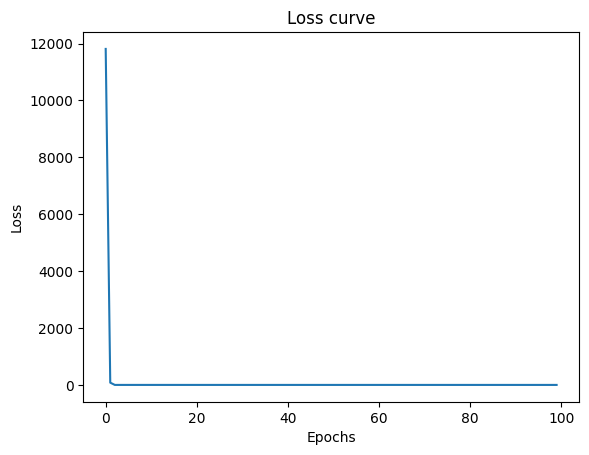

In [ ]:
fig, ax = plt.subplots()
ax.plot(losses)
ax.set_ylabel('Loss')
ax.set_xlabel('Epochs')
ax.set_title('Loss curve')
plt.show()

In [ ]:
model

Model(
  L1,
  L1,
  L1
)

The model gives very accurate results as far as 1-digit and 2-digit numbers are concerned but not with more digits. And also since 1-digit = `SET{ [2,4,6,8] }`, it is already in the training data.

In [ ]:
pred = model.eval(torch.tensor([72.,74.,76.,78.]))
# round(pred.item())
pred

tensor([80.4862])

In [ ]:
model.eval(torch.tensor([54.,56.,58.,60.]))

tensor([62.5936])

In [ ]:
model.eval(torch.tensor([22., 24.,26.,28.]))

tensor([30.7844])

In [ ]:
model.eval(torch.tensor([2., 4.,6.,8.]))

tensor([10.9037])

In [ ]:
model.eval(torch.tensor([10002., 10004, 1008., 10010.]))

tensor([3763.0339])

In [ ]:
model.eval(torch.tensor([902., 904., 906., 908.]))

tensor([905.5353])

In [ ]:
model.eval(torch.tensor([992., 994., 996., 998.]))

tensor([994.9987])

In [ ]:
print('Weights:')

for i, l in enumerate(model.layers):
  print(f'Layer {i+1}:   ',l.weights)
  print()

Weights:
Layer 1:    tensor([[ 0.3036, -0.4271,  0.3630,  0.2850]], requires_grad=True)

Layer 2:    tensor([1.0115], requires_grad=True)

Layer 3:    tensor([-1.2628], requires_grad=True)

Layer 4:    tensor([ 0.6895, -0.5465, -0.9625, -0.2982], requires_grad=True)

Layer 5:    tensor([-0.1103,  0.3741,  0.2553, -0.6983,  2.3282, -0.8964, -1.6366,  0.0840,
        -0.0961, -2.3568,  2.2505, -0.4052, -0.2973,  1.6994, -1.4950,  2.3278],
       requires_grad=True)

